In [133]:
pip install OpenML

In [134]:
import warnings
warnings.filterwarnings("ignore")

In [135]:
#Loading the data set
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Data Sets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [136]:
#data preparation
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

scaler = MinMaxScaler()
scaler = MinMaxScaler()
le = preprocessing.LabelEncoder()
df_x=df.copy()
df_x=df_x.drop('Species',axis=1)
df_y = df[['Species']]
scaler.fit(df_x)
df_X=scaler.transform(df_x)
df_X=pd.DataFrame(df_X)
le.fit(df_y)
df_y=le.transform(df_y)
df_y=pd.DataFrame(df_y)

In [137]:
print(df_X)


            0         1         2         3         4
0    0.000000  0.222222  0.625000  0.067797  0.041667
1    0.006711  0.166667  0.416667  0.067797  0.041667
2    0.013423  0.111111  0.500000  0.050847  0.041667
3    0.020134  0.083333  0.458333  0.084746  0.041667
4    0.026846  0.194444  0.666667  0.067797  0.041667
..        ...       ...       ...       ...       ...
145  0.973154  0.666667  0.416667  0.711864  0.916667
146  0.979866  0.555556  0.208333  0.677966  0.750000
147  0.986577  0.611111  0.416667  0.711864  0.791667
148  0.993289  0.527778  0.583333  0.745763  0.916667
149  1.000000  0.444444  0.416667  0.694915  0.708333

[150 rows x 5 columns]


In [138]:
def get_wcss_value(clustersize, data):
  k_cluster = KMeans(n_clusters = clustersize, init = 'k-means++',max_iter = 300, n_init =10, random_state =0)
  k_cluster.fit(data)
  return(k_cluster.inertia_)

In [139]:
def get_cluster_size(data):
 from joblib import delayed
 cluster_size_list = Parallel(n_jobs=1)(delayed(get_wcss_value)(i, data) for i in range(1,11))
 plt.plot(range(1,11), cluster_size_list)
 plt.title('Elbow Method')
 plt.xlabel('#clusters')
 plt.ylabel('WCSS_res')
 plt.show()

In [140]:
#Kmeans Algortithm
def kmean_cluster(n, data):
  k_cluster = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  pred_y = k_cluster.fit_predict(data)
  return pred_y

In [141]:
#Agglomerative Algorithm
def algo_cluster(n, data):
  clustering = AgglomerativeClustering(n_clusters = n ).fit_predict(data)
  return clustering

In [142]:
#DBScan
def db_cluster(data):
  clustering = DBSCAN(eps =10, min_samples=10).fit_predict(data)
  return clustering
  

In [143]:
#Optics
def optic_cluster(n, data):
  clustering = OPTICS(min_samples=n).fit_predict(data)
  return clustering

In [144]:
#Gaussian Mixtures
def gm_cluster(n, data):
  gmm = GaussianMixture(n_components = n)
  gmm.fit(data)
  clustering = gmm.predict(data)
  return clustering

In [145]:
#Affinity Propagation
def ap_cluster(data):
 clustering = AffinityPropagation(random_state = 5).fit_predict(data)
 return clustering

In [146]:
#MEAN SHift
def ms_cluster(data):
  ms = MeanShift()
  clustering = ms.fit_predict(data)
  return clustering

In [147]:
#Spectral
def sp_clustering(n, data):
  clustering = SpectralClustering(n_clusters=n, assign_labels = 'discretize',random_state =0).fit_predict(data)
  return(clustering)

In [148]:
#Ward Hierarchical
def ward_cluster(data):
  arr = ward(data)
  clusters = fcluster(arr, 300, criterion = 'distance')
  return clusters

In [149]:
#Birch
def birch_cluster(n, data):
  brc = Birch(n_clusters =n)
  brc.fit(data)
  clusters=brc.predict(data)
  return clusters

In [150]:

def calculate_result(y_pred, y_true, data):
  f1 = f1_score(y_true, y_pred, average='macro')
  ars = adjusted_rand_score(y_true, y_pred,)
  try:
    ss = silhouette_score(data, y_pred)
  except:
    ss = -1
  return (f1, ars, ss)

In [151]:
df_X.head()

,0,1,2,3,4
0,0.000000,0.222222,0.625000,0.067797,0.041667
1,0.006711,0.166667,0.416667,0.067797,0.041667
2,0.013423,0.111111,0.500000,0.050847,0.041667
3,0.020134,0.083333,0.458333,0.084746,0.041667
4,0.026846,0.194444,0.666667,0.067797,0.041667


In [152]:
df_y.head()

,0
0,0
1,0
2,0
3,0
4,0


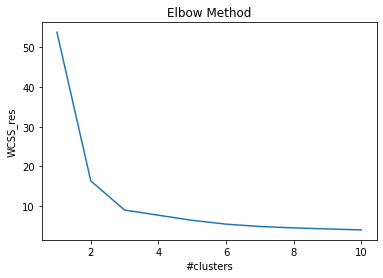

In [153]:
from joblib import Parallel
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


get_cluster_size(df_X)

In [154]:
final_list=[]

In [155]:
#Algortihm Kmeans
import time
s=time.perf_counter()#start time
y_pred_k=kmean_cluster(3,df_X)
e=time.perf_counter()#end time

In [156]:
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

f1, ars, ss = calculate_result(y_pred_k, df_y[0], df_X)
final_list.append(['KMeans', f1, ars, ss,e-s])


In [157]:
#db clustering algorithim
from sklearn.cluster import DBSCAN
s=time.perf_counter()
y_pred_db = db_cluster(df_X)
e=time.perf_counter()
f1, ars, ss = calculate_result(y_pred_k, df_y[0], df_X)
final_list.append(['DBSCAN', f1, ars, ss, e-s])

In [158]:
from sklearn.cluster import AgglomerativeClustering
s = time.perf_counter()
y_pred_algo= algo_cluster(3,df_X)
e = time.perf_counter()
f1 , ars , ss = calculate_result(y_pred_algo, df_y[0],df_X)
final_list.append(['Agglomerative',f1,ars,ss,e-s])


In [159]:
from sklearn.cluster import OPTICS
s=time.perf_counter()
y_pred_op = optic_cluster(3, df_X)
e=time.perf_counter()
f1, ars , ss = calculate_result(y_pred_op, df_y[0], df_X)
final_list.append(['Optics', f1, ars, ss, e-s])

In [160]:
from sklearn.mixture import GaussianMixture
s= time.perf_counter()
y_pred_gm = gm_cluster(3, df_X)
e = time.perf_counter()
f1, ars , ss = calculate_result(y_pred_gm,df_y[0],df_X)
final_list.append(['GaussianMix', f1, ars , ss, e-s])

In [161]:
from sklearn.cluster import AffinityPropagation
s=time.perf_counter()
y_pred_ap = ap_cluster(df_X)
e = time.perf_counter()
f1, ars , ss = calculate_result(y_pred_ap, df_y[0],df_X)
final_list.append(['Affinity', f1, ars , ss, e-s])

In [162]:
from sklearn.cluster import MeanShift
s = time.perf_counter()
y_pred_ms = ms_cluster(df_X)
e = time.perf_counter()
f1, ars , ss = calculate_result(y_pred_ms, df_y[0],df_X)
final_list.append(['MeanCluster', f1, ars, ss, e-s])

In [163]:
from sklearn.cluster import SpectralClustering
s = time.perf_counter()
y_pred_sc = sp_clustering(3, df_X)
e = time.perf_counter()
f1, ars , ss = calculate_result(y_pred_sc,df_y[0],df_X)
final_list.append(['Spectral', f1, ars, ss, e-s ])

In [164]:
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import fcluster
s= time.perf_counter()
y_pred_ward = ward_cluster(df_X)
e = time.perf_counter()
f1, ars , ss = calculate_result(y_pred_ward, df_y[0], df_X)
final_list.append(['Ward', f1, ars, ss, e-s])

In [165]:
from sklearn.cluster import Birch
s= time.perf_counter()
y_pred_br = birch_cluster(3,df_X)
e = time.perf_counter()
f1, ars, ss = calculate_result(y_pred_br, df_y[0], df_X)
final_list.append(['Birch', f1, ars, ss, e-s])

In [166]:
iris_df= pd.DataFrame(final_list, columns=['Algorithm' , 'F1-score', 'ARS', 'SS', 'Time'])

In [167]:
iris_df

,Algorithm,F1-score,ARS,SS,Time
0,KMeans,0.352751,0.941045,0.520362,0.039741
1,DBSCAN,0.352751,0.941045,0.520362,0.016922
2,Agglomerative,0.000000,1.000000,0.514095,0.008529
3,Optics,0.015152,0.048842,-0.220639,0.197042
4,GaussianMix,0.000000,1.000000,0.514095,0.082853
5,Affinity,0.108108,0.568035,0.296230,0.026952
6,MeanCluster,0.000000,0.568116,0.609672,1.050021
7,Spectral,0.037736,0.885950,0.513809,0.015617
8,Ward,0.166667,0.000000,-1.000000,0.015725
9,Birch,0.298701,0.486878,0.416663,0.029991


In [168]:
import time
import pandas as pd 
from joblib import Parallel
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering 

from sklearn import preprocessing

from sklearn.metrics import f1_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import Birch

In [169]:
wine_df = pd.read_csv('/content/drive/MyDrive/Data Sets/dataset_191_wine (1).csv')

In [170]:
wine_df['class'].unique()

array([1, 2, 3])

In [171]:
#data info
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   class                           178 non-null    int64  
 1   Alcohol                         178 non-null    float64
 2   Malic_acid                      178 non-null    float64
 3   Ash                             178 non-null    float64
 4   Alcalinity_of_ash               178 non-null    float64
 5   Magnesium                       178 non-null    int64  
 6   Total_phenols                   178 non-null    float64
 7   Flavanoids                      178 non-null    float64
 8   Nonflavanoid_phenols            178 non-null    float64
 9   Proanthocyanins                 178 non-null    float64
 10  Color_intensity                 178 non-null    float64
 11  Hue                             178 non-null    float64
 12  OD280%2FOD315_of_diluted_wines  178 

In [172]:
#preprcosessing the WIne data.
X= wine_df.drop(['class'], axis =1)
Y = wine_df[['class']]
print(scaler.fit(X))
X = scaler.transform(X)
X = pd.DataFrame(X)
le.fit(Y)
y = le.transform(Y)
y = pd.DataFrame(y)


MinMaxScaler()


In [173]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [174]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


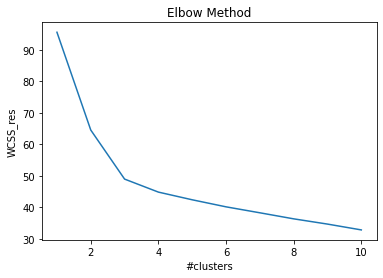

In [175]:
get_cluster_size(X)

In [176]:
Wine_reults=[]

In [177]:
s=time.perf_counter()
y_pred_K = kmean_cluster(3, X)
e= time.perf_counter()

In [178]:
f1, ars, ss = calculate_result(y_pred_K, y[0], X)

In [179]:
Wine_reults.append(['Kmeans', f1, ars, ss, e-s])

In [180]:
s = time.perf_counter()
y_pred_algo = algo_cluster(3, X)
e = time.perf_counter()

In [181]:
f1, ars, ss = calculate_result(y_pred_algo, y[0], X)

In [182]:
Wine_reults.append(['Agglomerative',f1, ars, ss, e-s])

In [183]:
s = time.perf_counter()
y_pred_db = db_cluster(X)
e = time.perf_counter()

In [184]:
f1, ars, ss = calculate_result(y_pred_db, y[0], X)

In [185]:
Wine_reults.append(['DBScan',f1, ars, ss, e-s])

In [186]:
s = time.perf_counter()
y_pred_opt = optic_cluster(3, X)
e = time.perf_counter()

In [187]:
f1, ars, ss = calculate_result(y_pred_opt, y[0], X)

In [188]:
Wine_reults.append(['Optics',f1, ars, ss, e-s])

In [189]:
s = time.perf_counter()
y_pred_gmc = gm_cluster(3, X)
e = time.perf_counter()

In [190]:
f1, ars, ss = calculate_result(y_pred_gmc, y[0], X)

In [191]:
Wine_reults.append(['Gaussian',f1, ars, ss, e-s])

In [192]:
s = time.perf_counter()
y_pred_apc = ap_cluster(X)
e = time.perf_counter()

In [193]:
f1, ars, ss = calculate_result(y_pred_apc, y[0], X)

In [194]:
Wine_reults.append(['Affinity propagation',f1, ars, ss, e-s])

In [195]:
s = time.perf_counter()
y_pred_msc = ms_cluster(X)
e = time.perf_counter()

In [196]:
f1, ars, ss = calculate_result(y_pred_msc, y[0], X)

In [197]:
Wine_reults.append(['Mean-shift',f1, ars, ss, e-s])

In [198]:
s = time.perf_counter()
y_pred_spc = sp_clustering(3, X)
e = time.perf_counter()

In [199]:
f1, ars, ss = calculate_result(y_pred_spc, y[0], X)

In [200]:
Wine_reults.append(['Spectral',f1, ars, ss, e-s])

In [201]:
s = time.perf_counter()
y_pred_ward = ward_cluster(X)
e = time.perf_counter()

In [202]:
f1, ars, ss = calculate_result(y_pred_ward, y[0], X)

In [203]:
Wine_reults.append(['Ward hierarchical',f1, ars, ss, e-s])

In [204]:
s = time.perf_counter() 
y_pred_birch = birch_cluster(3,X)
e = time.perf_counter()

In [205]:
f1, ars, ss = calculate_result(y_pred_birch, y[0], X)

In [206]:
Wine_reults.append(['Birch',f1, ars, ss, e-s])

In [207]:
wine_df = pd.DataFrame(Wine_reults, columns=['Algorithm', 'F1-Score', 'ARS', 'SS', 'Time'])

In [208]:
wine_df

,Algorithm,F1-Score,ARS,SS,Time
0,Kmeans,0.364815,0.853660,0.300894,0.044277
1,Agglomerative,0.021276,0.931000,0.294829,0.008016
2,DBScan,0.165963,0.000000,-1.000000,0.010660
3,Optics,0.017677,0.005053,-0.230225,0.175150
4,Gaussian,0.333424,0.896129,0.296253,0.037343
5,Affinity propagation,0.010661,0.268948,0.111901,0.049179
6,Mean-shift,0.165963,0.000000,-1.000000,1.334035
7,Spectral,0.010101,0.914880,0.300955,0.049038
8,Ward hierarchical,0.190094,0.000000,-1.000000,0.002785
9,Birch,0.278632,0.417411,0.281055,0.015222


In [209]:
#loading the glass dataset
glass_data = pd.read_csv(r'/content/drive/MyDrive/Data Sets/dataset_41_glass.csv')

In [210]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [211]:
#information about the dataframe
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [212]:
#Glass Data Preprocessing
X=glass_data.drop(['Type'], axis = 1)
y= glass_data[['Type']]
print(scaler.fit(X))
X=scaler.transform(X)
glass_X=pd.DataFrame(X)
le.fit(y)
y=le.transform(y)
glass_y=pd.DataFrame(y)


MinMaxScaler()


In [213]:
glass_X.head()

,0,1,2,3,4,5,6,7,8
0,0.297629,0.309774,0.779510,0.258567,0.575000,0.103060,0.310409,0.0,0.000000
1,0.231782,0.215038,0.783964,0.330218,0.550000,0.091787,0.288104,0.0,0.000000
2,0.297629,0.372932,0.775056,0.348910,0.505357,0.095008,0.278810,0.0,0.000000
3,0.080773,0.551880,0.387528,0.389408,0.846429,0.000000,0.200743,0.0,0.000000
4,1.000000,0.236090,0.000000,0.221184,0.062500,0.019324,1.000000,0.0,0.470588


In [214]:
glass_y.head()

,0
0,0
1,2
2,0
3,5
4,1


In [215]:
glass_results=[]

In [216]:
s = time.perf_counter()
y_pred_K = kmean_cluster(3, glass_X)
e = time.perf_counter()

In [217]:
f1, ars, ss = calculate_result(y_pred_K, glass_y[0], glass_y)

In [218]:
glass_results.append(['Kmeans',f1, ars, ss, e-s])

In [219]:
s=time.perf_counter()
y_pred_algo = algo_cluster(3,glass_X)
e= time.perf_counter()


In [220]:
f1, ars, ss = calculate_result(y_pred_K, glass_y[0], glass_X)

In [221]:
glass_results.append(['Agglomerative',f1,ars,ss,e-s])

In [222]:
s = time.perf_counter()
y_pred_db = db_cluster(glass_X)
e = time.perf_counter()

In [223]:
f1, ars, ss = calculate_result(y_pred_db, glass_y[0], glass_X)

In [224]:
glass_results.append(['DBScan',f1,ars,ss,e-s])

In [225]:
s = time.perf_counter()
y_pred_opt = optic_cluster(3, glass_X)
e = time.perf_counter()

In [226]:
f1, ars, ss = calculate_result(y_pred_opt, glass_y[0], glass_X)

In [227]:
glass_results.append(['y_pred_opt',f1,ars,ss,e-s])

In [228]:
s = time.perf_counter()
y_pred_gmc = gm_cluster(3, glass_X)
e = time.perf_counter()

In [229]:
f1, ars, ss =calculate_result(y_pred_gmc, glass_y[0], glass_X)

In [230]:
glass_results.append(['Gaussian',f1, ars, ss, e-s])

In [231]:
s = time.perf_counter()
y_pred_apc = ap_cluster(glass_X)
e = time.perf_counter()

In [232]:
f1, ars, ss = calculate_result(y_pred_apc, glass_y[0], glass_X)

In [233]:
glass_results.append(['Affinity propagation',f1, ars, ss, e-s])

In [234]:
s = time.perf_counter()
y_pred_msc = ms_cluster(glass_X)
e = time.perf_counter()

In [235]:
f1,ars,ss=calculate_result(y_pred_msc, glass_y[0], glass_X)

In [236]:
glass_results.append(['Mean-shift',f1, ars, ss, e-s])

In [237]:
s = time.perf_counter()
y_pred_spc = sp_clustering(3, glass_X)
e = time.perf_counter()

In [238]:
f1,ars,ss = calculate_result(y_pred_spc, glass_y[0], glass_X)

In [239]:
glass_results.append(['Spectral',f1, ars, ss, e-s])

In [240]:
s = time.perf_counter()
y_pred_ward = ward_cluster(glass_X)
e = time.perf_counter()

In [241]:
f1,ars,ss = calculate_result(y_pred_ward, glass_y[0], glass_X)

In [242]:
glass_results.append(['Ward hierarchical',f1, ars, ss, e-s])

In [243]:
s = time.perf_counter()
y_pred_birch = birch_cluster(3, glass_X)
e = time.perf_counter()

In [244]:
f1,ars,ss = calculate_result(y_pred_birch, glass_y[0], glass_X)

In [245]:
glass_results.append(['Birch',f1, ars, ss, e-s])

In [246]:
glass_df = pd.DataFrame(glass_results, columns=['Algorithm', 'F1-Score', 'ARS', 'SS', 'Time'])

In [247]:
glass_df

,Algorithm,F1-Score,ARS,SS,Time
0,Kmeans,0.139205,0.241745,0.306872,0.042853
1,Agglomerative,0.139205,0.241745,0.525244,0.009531
2,DBScan,0.082160,0.000000,-1.000000,0.008386
3,y_pred_opt,0.006898,0.037261,-0.095365,0.223035
4,Gaussian,0.152969,0.226665,0.400711,0.034833
5,Affinity propagation,0.007937,0.127707,0.288325,0.082807
6,Mean-shift,0.059492,0.248487,0.412980,1.216017
7,Spectral,0.097211,0.252674,0.502955,0.045606
8,Ward hierarchical,0.087356,0.000000,-1.000000,0.008424
9,Birch,0.104910,0.007482,0.356349,0.015279


In [260]:
wine_df

,Algorithm,F1-Score,ARS,SS,Time
0,Kmeans,0.364815,0.853660,0.300894,0.044277
1,Agglomerative,0.021276,0.931000,0.294829,0.008016
2,DBScan,0.165963,0.000000,-1.000000,0.010660
3,Optics,0.017677,0.005053,-0.230225,0.175150
4,Gaussian,0.333424,0.896129,0.296253,0.037343
5,Affinity propagation,0.010661,0.268948,0.111901,0.049179
6,Mean-shift,0.165963,0.000000,-1.000000,1.334035
7,Spectral,0.010101,0.914880,0.300955,0.049038
8,Ward hierarchical,0.190094,0.000000,-1.000000,0.002785
9,Birch,0.278632,0.417411,0.281055,0.015222


In [248]:
glass_df.to_csv('file_name.csv', index=False)

In [249]:
glass_df.to_csv(r'/content/drive/MyDrive/Data Sets/glassRes.csv')

In [258]:
#2.1for each dataset compare and contrast results produced by each algorithm under optimal parameter settings
from plotly.subplots import make_subplots
import plotly.express as px
fig = px.bar(iris_df, x = 'Algorithm', y= ['F1-score','ARS','SS'])
fig.show()

In [263]:
from plotly.subplots import make_subplots
import plotly.express as px
fig = px.bar(wine_df, x = 'Algorithm', y= ['F1-Score','ARS','SS'])
fig.show()

In [265]:
from plotly.subplots import make_subplots
import plotly.express as px
fig = px.bar(glass_df, x = 'Algorithm', y= ['F1-Score','ARS','SS'])
fig.show()